# Stocks Analysis LSTM

In the following notebook we will be analysing the amazon stock prices.

In [6]:
import pandas as pd
import numpy as np
from keras.datasets import imdb

data = pd.read_csv('AMZN.csv', header = 0, usecols = ['Date', 'Close'], parse_dates = True, index_col = 'Date')

print("------ INFO -----")
print(data.info())

print("")
print("")

print("------ HEAD 10 -----")

print(data.head(10))


print("")
print("")

print("------ DESCRIBE 10 -----")

print(data.describe())


------ INFO -----
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4279 entries, 2002-05-13 to 2019-05-10
Data columns (total 1 columns):
Close    4279 non-null float64
dtypes: float64(1)
memory usage: 66.9 KB
None


------ HEAD 10 -----
                Close
Date                 
2002-05-13  17.320000
2002-05-14  18.809999
2002-05-15  19.940001
2002-05-16  19.610001
2002-05-17  19.160000
2002-05-20  19.389999
2002-05-21  18.760000
2002-05-22  18.750000
2002-05-23  19.450001
2002-05-24  19.469999


------ DESCRIBE 10 -----
             Close
count  4279.000000
mean    351.841227
std     467.980919
min      12.490000
25%      46.205000
50%     164.970001
75%     384.220001
max    2039.510010


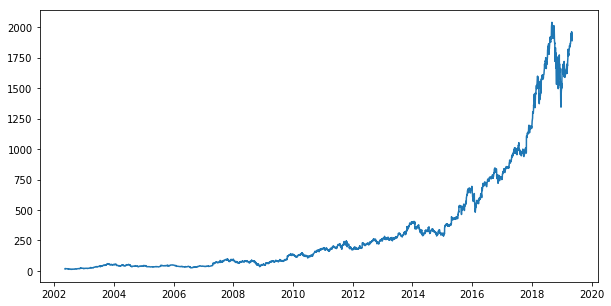

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(data)
plt.show()



In [9]:
print(data.pct_change())

               Close
Date                
2002-05-13       NaN
2002-05-14  0.086028
2002-05-15  0.060075
2002-05-16 -0.016550
2002-05-17 -0.022948
2002-05-20  0.012004
2002-05-21 -0.032491
2002-05-22 -0.000533
2002-05-23  0.037333
2002-05-24  0.001028
2002-05-28 -0.021058
2002-05-29 -0.007870
2002-05-30 -0.028556
2002-05-31 -0.007621
2002-06-03 -0.014811
2002-06-04  0.000557
2002-06-05  0.001113
2002-06-06  0.010006
2002-06-07  0.022565
2002-06-10 -0.068891
2002-06-11 -0.009249
2002-06-12 -0.003501
2002-06-13  0.020492
2002-06-14 -0.034997
2002-06-17  0.094530
2002-06-18  0.020098
2002-06-19 -0.025559
2002-06-20 -0.040984
2002-06-21 -0.001139
2002-06-24 -0.001141
...              ...
2019-03-29  0.004133
2019-04-01  0.018779
2019-04-02 -0.000116
2019-04-03  0.003705
2019-04-04 -0.001011
2019-04-05  0.010127
2019-04-08  0.006847
2019-04-09 -0.007579
2019-04-10  0.006259
2019-04-11 -0.001765
2019-04-12 -0.000548
2019-04-15  0.000982
2019-04-16  0.009849
2019-04-17  0.000955
2019-04-18 -0

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataScaled = scaler.fit_transform(data)

In [20]:
trainLen = int(len(dataScaled) * 0.7)
testLen = len(dataScaled) - trainLen
trainData = dataScaled[0:trainLen, :]
testData = dataScaled[trainLen:len(dataScaled), :]

print(len(trainData), len(testData))

(2995, 1284)


## Training

In [21]:
def datasetCreation(dataset, timestep = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - timestep - 1):
        dataX.append(dataset[i:(i + timestep), 0])
        dataY.append(dataset[i + timestep, 0])
        
    return np.array(dataX), np.array(dataY)

In [22]:
timestep = 1
train_x, train_y = datasetCreation(trainData, timestep)
test_x, test_y = datasetCreation(testData, timestep)


In [23]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))


In [24]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation

model = Sequential()

model.add(LSTM(256, input_shape=(1, timestep)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
model.fit(train_x, train_y, epochs = 100, batch_size = 1, verbose = 1)

Epoch 1/100
2993/2993 [==============================] - 10s 3ms/step - loss: 0.0052 - acc: 3.3411e-04
Epoch 2/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.9258e-04 - acc: 3.3411e-04
Epoch 3/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.8606e-04 - acc: 3.3411e-04
Epoch 4/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.7542e-04 - acc: 3.3411e-04
Epoch 5/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.6417e-04 - acc: 3.3411e-04
Epoch 6/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.5081e-04 - acc: 3.3411e-04
Epoch 7/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.4256e-04 - acc: 3.3411e-04
Epoch 8/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.3039e-04 - acc: 3.3411e-04
Epoch 9/100
2993/2993 [==============================] - 10s 3ms/step - loss: 1.1346e-04 - acc: 3.3411e-04
Epoch 10/100
2993/2993 [=================

2993/2993 [==============================] - 10s 3ms/step - loss: 3.9608e-06 - acc: 3.3411e-04
Epoch 77/100
2993/2993 [==============================] - 11s 4ms/step - loss: 3.7765e-06 - acc: 3.3411e-04
Epoch 78/100
2993/2993 [==============================] - 11s 4ms/step - loss: 3.6310e-06 - acc: 3.3411e-04
Epoch 79/100
2993/2993 [==============================] - 11s 4ms/step - loss: 3.7705e-06 - acc: 3.3411e-04
Epoch 80/100
2993/2993 [==============================] - 10s 3ms/step - loss: 3.6095e-06 - acc: 3.3411e-04
Epoch 81/100
2993/2993 [==============================] - 10s 3ms/step - loss: 3.5964e-06 - acc: 3.3411e-04
Epoch 82/100
2993/2993 [==============================] - 10s 3ms/step - loss: 3.5795e-06 - acc: 3.3411e-04
Epoch 83/100
2993/2993 [==============================] - 10s 3ms/step - loss: 3.8563e-06 - acc: 3.3411e-04
Epoch 84/100
2993/2993 [==============================] - 10s 3ms/step - loss: 3.5585e-06 - acc: 3.3411e-04
Epoch 85/100
2993/2993 [=================

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [27]:
score = model.evaluate(train_x, train_y, verbose = 0)
print("Keras model loss = ", score[0])
print("Keras model accuray = ", score[1])

trainPred = model.predict(train_x)
testPred = model.predict(test_x)

('Keras model loss = ', 2.628268868655158e-06)
('Keras model accuray = ', 0.0003341129301703976)


# Visualizing the results

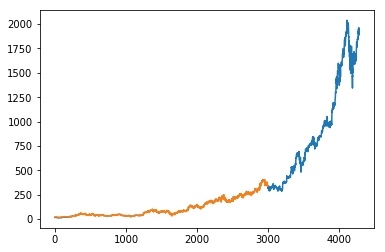

In [32]:
trainPred = scaler.inverse_transform(trainPred)
train_y = scaler.inverse_transform([train_y])
testPred = scaler.inverse_transform(testPred)
test_y = scaler.inverse_transform([test_y])

trainPredictPlot = np.empty_like(dataScaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPred) + 1, :] = trainPred

testPredictPlot = np.empty_like(dataScaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[1:len(trainPred) + (1 * 2) + 1:len(dataScaled) - 1, :] = testPred

plt.plot(scaler.inverse_transform(dataScaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

